In [1]:
import numpy as np
from scipy import optimize
from scipy.constants import mu_0, epsilon_0
from scipy import fftpack
from scipy import sparse
from scipy.special import factorial
from scipy.signal import butter, filtfilt
from scipy.interpolate import interp1d, CubicSpline,splrep, BSpline
from scipy.sparse import csr_matrix, csc_matrix
import csv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.linalg import lu_factor, lu_solve
from scipy import signal
import ipywidgets
import empymod
import discretize
import  os


In [2]:
import torch
import torch.nn.functional as F
from torch.autograd.functional import jacobian
eps = torch.finfo(torch.float32).eps
print(eps)

1.1920928955078125e-07


In [3]:
from masa_utils import PsuedoLog
from masa_utils_pytorch import InducedPolarization
from masa_utils_pytorch import Optimization

In [4]:
parm_true = torch.tensor([np.log(200.), 0.5, np.log(0.01), 0.7], dtype=torch.float32, requires_grad=False)
parm_init = torch.tensor([np.log(100.), 0.1, np.log(0.001), 0.5], dtype=torch.float32, requires_grad=True)


In [5]:
#nfreq = torch.tensor(100, dtype=torch.float32)
nfreq = 20
#nfreq_plot = nfreq.item()
freqcen = 1 / torch.exp(parm_true[2])
freqend_log = torch.log10(freqcen* 1e1).item()
freqstrt_log = torch.log10(freqcen * 1e-3).item()
print(freqcen,freqend_log, freqstrt_log)
#freqend_scalar = freqend.item()

freq = torch.logspace(freqstrt_log, freqend_log, nfreq) 
freq = torch.cat((torch.tensor([0.]), freq))
#freq = torch.logspace(-5, 5, 100) 

freq_plot = freq.detach().numpy()
print(freq)

tensor(100.) 3.0 -1.0
tensor([0.0000e+00, 1.0000e-01, 1.6238e-01, 2.6367e-01, 4.2813e-01, 6.9519e-01,
        1.1288e+00, 1.8330e+00, 2.9764e+00, 4.8329e+00, 7.8476e+00, 1.2743e+01,
        2.0691e+01, 3.3598e+01, 5.4556e+01, 8.8587e+01, 1.4384e+02, 2.3357e+02,
        3.7927e+02, 6.1585e+02, 1.0000e+03])


In [6]:
IP_model = InducedPolarization(freq=freq)

In [7]:
IP_model.pelton_res_f(p=parm_true)
#IP_model.pelton_res_f(p=parm_true)

tensor([200.0000+0.0000j, 198.6483-2.4950j, 198.0777-3.4646j,
        197.2554-4.7888j, 196.0630-6.5744j, 194.3253-8.9375j,
        191.7885-11.9773j, 188.1049-15.7191j, 182.8521-20.0186j,
        175.6354-24.4424j, 166.3210-28.2142j, 155.3290-30.3864j,
        143.7205-30.2876j, 132.8348-27.9503j, 123.6871-24.0886j,
        116.6435-19.6500j, 111.5369-15.3849j, 107.9636-11.6988j,
        105.5048-8.7175j, 103.8206-6.4063j, 102.6645-4.6633j])

In [8]:
#IP_model.dpred = IP_model.pelton_res_f
IP_model.ip_model = IP_model.pelton_res_f

In [9]:
IP_model.dpred(parm_true)

tensor([200.0000, 198.6483, 198.0777, 197.2554, 196.0630, 194.3253, 191.7885,
        188.1049, 182.8521, 175.6354, 166.3210, 155.3290, 143.7205, 132.8348,
        123.6871, 116.6435, 111.5369, 107.9636, 105.5048, 103.8206, 102.6645,
          0.0000,  -2.4950,  -3.4646,  -4.7888,  -6.5744,  -8.9375, -11.9773,
        -15.7191, -20.0186, -24.4424, -28.2142, -30.3864, -30.2876, -27.9503,
        -24.0886, -19.6500, -15.3849, -11.6988,  -8.7175,  -6.4063,  -4.6633])

In [10]:
IP_model.J(parm_true)

tensor([[ 200.0000,    0.0000,    0.0000,    0.0000],
        [ 198.6483,   -2.7035,   -0.9770,   10.8893],
        [ 198.0777,   -3.8446,   -1.4038,   14.4279],
        [ 197.2554,   -5.4893,   -2.0290,   18.9947],
        [ 196.0630,   -7.8741,   -2.9500,   24.7510],
        [ 194.3253,  -11.3495,   -4.3060,   31.7051],
        [ 191.7885,  -16.4231,   -6.2803,   39.4643],
        [ 188.1049,  -23.7901,   -9.0657,   46.8090],
        [ 182.8521,  -34.2959,  -12.7504,   51.1997],
        [ 175.6354,  -48.7293,  -17.0818,   48.7688],
        [ 166.3210,  -67.3580,  -21.2077,   35.8888],
        [ 155.3291,  -89.3420,  -23.7646,   12.6351],
        [ 143.7205, -112.5590,  -23.6453,  -14.8395],
        [ 132.8347, -134.3305,  -20.9060,  -37.3876],
        [ 123.6871, -152.6258,  -16.7152,  -49.3299],
        [ 116.6435, -166.7130,  -12.4143,  -51.0367],
        [ 111.5369, -176.9262,   -8.8010,  -46.2688],
        [ 107.9636, -184.0728,   -6.0886,  -38.8142],
        [ 105.5048, -188.990

In [11]:
sim= IP_model

In [12]:
sim.dpred(parm_true)

tensor([200.0000, 198.6483, 198.0777, 197.2554, 196.0630, 194.3253, 191.7885,
        188.1049, 182.8521, 175.6354, 166.3210, 155.3290, 143.7205, 132.8348,
        123.6871, 116.6435, 111.5369, 107.9636, 105.5048, 103.8206, 102.6645,
          0.0000,  -2.4950,  -3.4646,  -4.7888,  -6.5744,  -8.9375, -11.9773,
        -15.7191, -20.0186, -24.4424, -28.2142, -30.3864, -30.2876, -27.9503,
        -24.0886, -19.6500, -15.3849, -11.6988,  -8.7175,  -6.4063,  -4.6633])

In [13]:
sim.J(parm_true)

tensor([[ 200.0000,    0.0000,    0.0000,    0.0000],
        [ 198.6483,   -2.7035,   -0.9770,   10.8893],
        [ 198.0777,   -3.8446,   -1.4038,   14.4279],
        [ 197.2554,   -5.4893,   -2.0290,   18.9947],
        [ 196.0630,   -7.8741,   -2.9500,   24.7510],
        [ 194.3253,  -11.3495,   -4.3060,   31.7051],
        [ 191.7885,  -16.4231,   -6.2803,   39.4643],
        [ 188.1049,  -23.7901,   -9.0657,   46.8090],
        [ 182.8521,  -34.2959,  -12.7504,   51.1997],
        [ 175.6354,  -48.7293,  -17.0818,   48.7688],
        [ 166.3210,  -67.3580,  -21.2077,   35.8888],
        [ 155.3291,  -89.3420,  -23.7646,   12.6351],
        [ 143.7205, -112.5590,  -23.6453,  -14.8395],
        [ 132.8347, -134.3305,  -20.9060,  -37.3876],
        [ 123.6871, -152.6258,  -16.7152,  -49.3299],
        [ 116.6435, -166.7130,  -12.4143,  -51.0367],
        [ 111.5369, -176.9262,   -8.8010,  -46.2688],
        [ 107.9636, -184.0728,   -6.0886,  -38.8142],
        [ 105.5048, -188.990

# define Optimization

In [14]:
relative_error = 0#0.05
noise_floor = 5.0 #0.0
dinit = sim.dpred(parm_init)

dobs_clean = sim.dpred(parm_true)
torch.random.seed()
dobs = ( dobs_clean
    + torch.rand(len(dobs_clean)) * torch.sqrt(
        (relative_error * abs(dobs_clean))**2 
        + noise_floor*torch.ones(len(dobs_clean))**2
    )
    )


In [15]:
opt = Optimization(sim=IP_model, dobs=dobs)

In [16]:
Wd =opt.get_Wd(ratio=relative_error, plateau=noise_floor)
opt.Ws = torch.eye(len(parm_init))

In [17]:
beta0 = opt.BetaEstimate_byEig(mvec=parm_init)
print(beta0)

8526.0732421875


In [18]:
niter = 50
mpred,error_prg, mvec_prg = opt.GaussNewton(mvec_init=parm_init,niter=niter,beta0=beta0)



  1, beta:8.5e+03, step:1.0e+00, gradient:5.0e+03,  f:8.6e+02
  2, beta:8.5e+03, step:1.0e+00, gradient:4.4e+02,  f:7.9e+02
  3, beta:4.3e+03, step:1.0e+00, gradient:1.5e+03,  f:5.3e+02
  4, beta:4.3e+03, step:1.0e+00, gradient:2.0e+02,  f:5.0e+02
  5, beta:2.1e+03, step:1.0e+00, gradient:9.9e+02,  f:3.1e+02
  6, beta:2.1e+03, step:1.0e+00, gradient:1.6e+02,  f:3.0e+02
  7, beta:1.1e+03, step:1.0e+00, gradient:6.4e+02,  f:1.8e+02


  8, beta:1.1e+03, step:1.0e+00, gradient:1.5e+02,  f:1.8e+02
  9, beta:5.3e+02, step:1.0e+00, gradient:3.8e+02,  f:1.1e+02
 10, beta:5.3e+02, step:6.2e-02, gradient:3.0e+02,  f:1.1e+02
 11, beta:2.7e+02, step:6.2e-02, gradient:4.3e+02,  f:1.1e+02
 12, beta:2.7e+02, step:6.2e-02, gradient:4.1e+02,  f:1.0e+02
 13, beta:1.3e+02, step:6.2e-02, gradient:4.8e+02,  f:1.0e+02
 14, beta:1.3e+02, step:6.2e-02, gradient:4.6e+02,  f:9.6e+01
 15, beta:6.7e+01, step:6.2e-02, gradient:4.9e+02,  f:9.2e+01
 16, beta:6.7e+01, step:6.2e-02, gradient:4.7e+02,  f:8.8e+01
 17, beta:3.3e+01, step:6.2e-02, gradient:4.8e+02,  f:8.4e+01
 18, beta:3.3e+01, step:6.2e-02, gradient:4.6e+02,  f:8.0e+01
 19, beta:1.7e+01, step:6.2e-02, gradient:4.5e+02,  f:7.6e+01
 20, beta:1.7e+01, step:6.2e-02, gradient:4.4e+02,  f:7.2e+01
 21, beta:8.3e+00, step:6.2e-02, gradient:4.3e+02,  f:6.8e+01
 22, beta:8.3e+00, step:6.2e-02, gradient:4.1e+02,  f:6.5e+01
 23, beta:4.2e+00, step:6.2e-02, gradient:4.0e+02,  f:6.0e+01
 24, bet

# Plot

In [19]:
np_mvec_prg = mvec_prg.detach().numpy()
np_mvec_init = parm_init.detach().numpy()
np_mvec_true = parm_true.detach().numpy()
np_mvec_est = mpred.detach().numpy()
dest = sim.dpred(mpred)

In [20]:
print(f"initial :{np.exp(np_mvec_init[0]):.3e}, {np_mvec_init[1]:3f}, {np.exp(np_mvec_init[2]):.3e}, {np_mvec_init[3]:.3f}")
print(f"est     :{np.exp(np_mvec_est[0]):.3e}, { np_mvec_est[1]:3f}, { np.exp(np_mvec_est[2]):.3e}, { np_mvec_est[3]:.3f}")
print(f"true    :{np.exp(np_mvec_true[0]):.3e}, {np_mvec_true[1]:3f}, {np.exp(np_mvec_true[2]):.3e}, {np_mvec_true[3]:.3f}")


initial :1.000e+02, 0.100000, 1.000e-03, 0.500
est     :1.994e+02, 0.497079, 8.888e-03, 0.657
true    :2.000e+02, 0.500000, 1.000e-02, 0.700


In [21]:
nwindow = len(freq)
dest_real = dest[:nwindow].detach().numpy().flatten()
dest_imag = dest[nwindow:].detach().numpy().flatten()
dobs_real = dobs[:nwindow].detach().numpy().flatten()
dobs_imag = dobs[nwindow:].detach().numpy().flatten()
dinit_real = dinit[:nwindow].detach().numpy().flatten()
dinit_imag = dinit[nwindow:].detach().numpy().flatten()
windows_plot = freq.detach().numpy()

In [22]:
PL_pelton = PsuedoLog(
            logmin=1e-7,
            linScale=0.2,
            logminx=10.**np.floor(np.log10(windows_plot[windows_plot>eps].min())),
            linScalex=0.2)

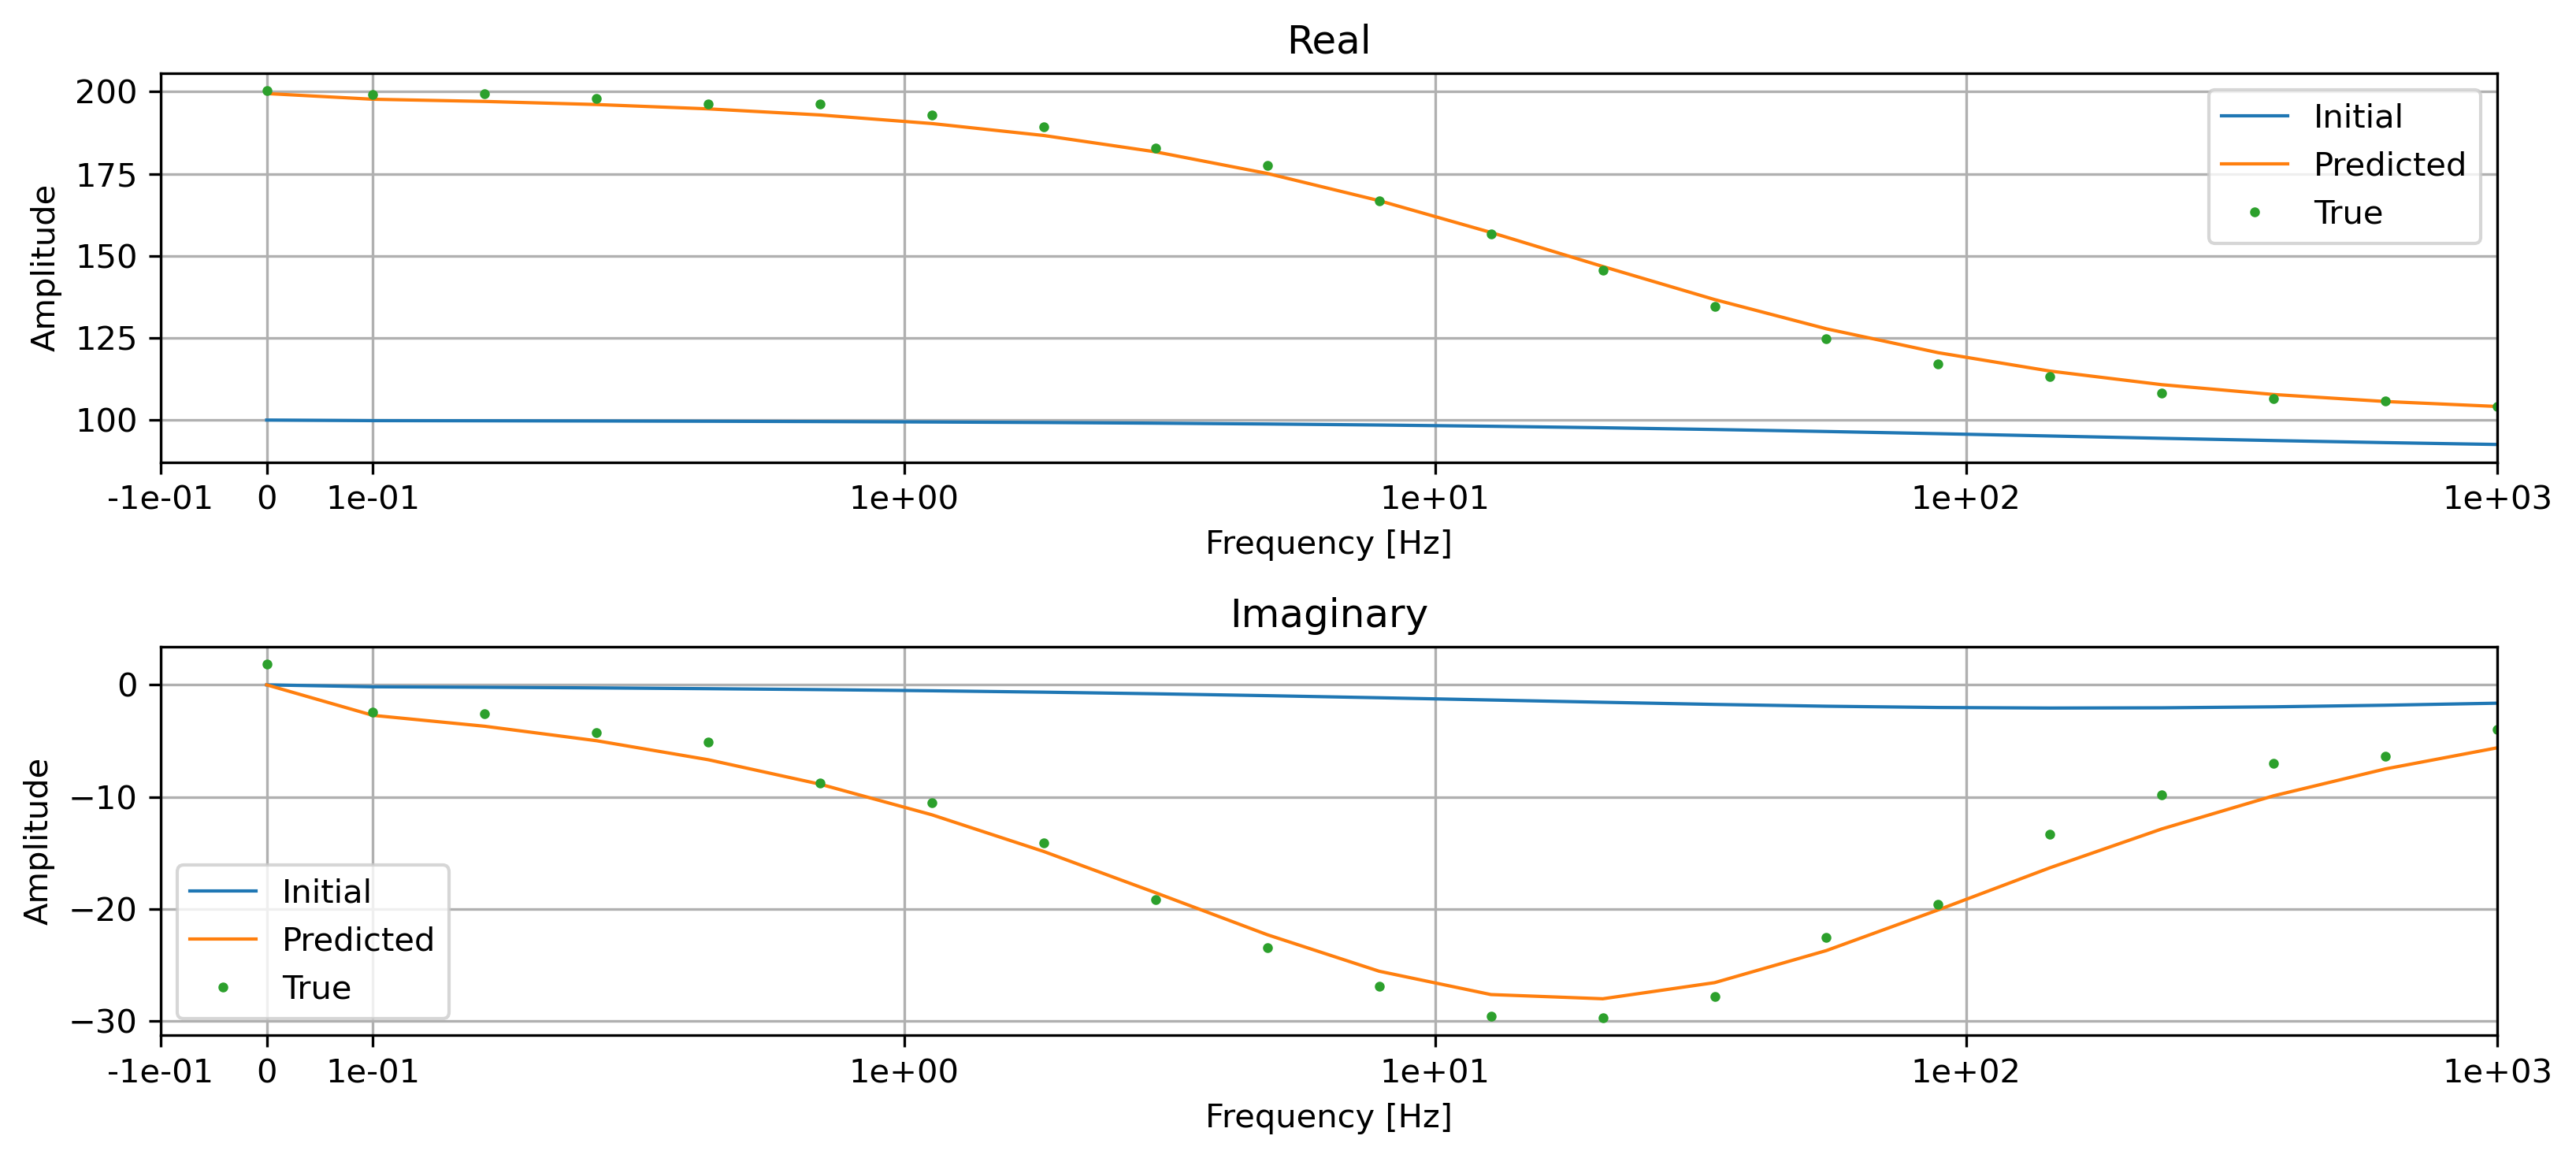

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(11, 5),dpi=300)
ax[0] = PL_pelton.semiplx(x=windows_plot, y=dinit_real, ax=ax[0], yscale_log=False,
                          color = "C0",label="Initial")
ax[0] = PL_pelton.semiplx(x=windows_plot, y=dest_real, ax=ax[0], yscale_log=False,
                            color = "C1",label="Predicted")
ax[0] = PL_pelton.semiplx(x=windows_plot, y=dobs_real, ax=ax[0], yscale_log=False,
                 color = "C2",linestyle="",markersize=4.0, marker=".",label="True")
PL_pelton.pl_axes_x(ax=ax[0])
ax[1] = PL_pelton.semiplx(x=windows_plot, y=dinit_imag, ax=ax[1], yscale_log=False,
                                color = "C0",label="Initial")
ax[1] = PL_pelton.semiplx(x=windows_plot, y=dest_imag, ax=ax[1], yscale_log=False,
                                color = "C1",label="Predicted")
ax[1] = PL_pelton.semiplx(x=windows_plot, y=dobs_imag, ax=ax[1], yscale_log=False,
                 color = "C2",linestyle="",markersize=4.0, marker=".",label="True")
PL_pelton.pl_axes_x(ax=ax[1])
for a in ax:
        a.set_xlabel('Frequency [Hz]')
        a.set_ylabel('Amplitude')
        a.grid(which='both')
        a.legend()
ax[0].set_title('Real')
ax[1].set_title('Imaginary')
plt.tight_layout()

Try two relaxation

In [24]:
parm_true = torch.tensor([np.log(131.), 0.71, np.log(127), 0.28, np.log(1.5e-7), 0.30], dtype=torch.float32, requires_grad=False)
parm_init = torch.tensor([np.log(100.), 0.10, np.log(10), 0.40, np.log(1.0e-5), 0.40], dtype=torch.float32, requires_grad=True)


In [25]:
ind_test = [1,3] #@ [1]
parm_true[ind_test]

tensor([0.7100, 0.2800])

In [26]:
#nfreq = torch.tensor(100, dtype=torch.float32)
nfreq = 36
#nfreq_plot = nfreq.item()
freqcen = 1 / torch.exp(parm_true[2])
# freqend_log = torch.log10(torch.tensor(1e10)).item()
# freqstrt_log = torch.log10(torch.tensor(1e-5)).item()
freqend_log = torch.log10(torch.tensor(1e5)).item()
freqstrt_log = torch.log10(torch.tensor(1e-2)).item()
print(freqcen,freqend_log, freqstrt_log)
#freqend_scalar = freqend.item()

freq = torch.logspace(freqstrt_log, freqend_log, nfreq) 
#freq = torch.cat((torch.tensor([0.]), freq))
#freq = torch.logspace(-5, 5, 100) 

freq_plot = freq.detach().numpy()
print(freq.shape)
print(freq)

tensor(0.0079) 5.0 -2.0
torch.Size([36])
tensor([1.0000e-02, 1.5849e-02, 2.5119e-02, 3.9811e-02, 6.3096e-02, 1.0000e-01,
        1.5849e-01, 2.5119e-01, 3.9811e-01, 6.3096e-01, 1.0000e+00, 1.5849e+00,
        2.5119e+00, 3.9811e+00, 6.3096e+00, 1.0000e+01, 1.5849e+01, 2.5119e+01,
        3.9811e+01, 6.3096e+01, 1.0000e+02, 1.5849e+02, 2.5119e+02, 3.9811e+02,
        6.3096e+02, 1.0000e+03, 1.5849e+03, 2.5119e+03, 3.9811e+03, 6.3096e+03,
        1.0000e+04, 1.5849e+04, 2.5119e+04, 3.9811e+04, 6.3096e+04, 1.0000e+05])


In [27]:
Pelton_two = InducedPolarization(freq=freq)

In [28]:
Pelton_two.ip_model = Pelton_two.pelton_res_f_two
print(Pelton_two.dpred(parm_true))

tensor([70.4767, 67.6506, 64.9575, 62.4102, 60.0173, 57.7830, 55.7081, 53.7904,
        52.0246, 50.4038, 48.9192, 47.5610, 46.3185, 45.1808, 44.1366, 43.1746,
        42.2838, 41.4532, 40.6721, 39.9302, 39.2173, 38.5235, 37.8391, 37.1548,
        36.4614, 35.7501, 35.0122, 34.2396, 33.4246, 32.5604, 31.6410, 30.6615,
        29.6188, 28.5114, 27.3397, 26.1068, -9.6171, -9.2342, -8.8026, -8.3348,
        -7.8430, -7.3390, -6.8333, -6.3353, -5.8528, -5.3924, -4.9590, -4.5564,
        -4.1872, -3.8532, -3.5552, -3.2937, -3.0686, -2.8795, -2.7257, -2.6067,
        -2.5214, -2.4692, -2.4491, -2.4602, -2.5012, -2.5708, -2.6676, -2.7894,
        -2.9337, -3.0976, -3.2771, -3.4676, -3.6639, -3.8597, -4.0484, -4.2230])


In [29]:

J = Pelton_two.J(parm_init)
print(J.shape)
print(J)


torch.Size([72, 6])
tensor([[ 9.5254e+01, -4.4793e+01, -1.0903e+00,  1.5164e+00, -1.0315e-01,
          3.9643e+00],
        [ 9.4696e+01, -4.9831e+01, -1.1020e+00,  3.8233e-03, -1.2332e-01,
          4.5965e+00],
        [ 9.4128e+01, -5.4859e+01, -1.0891e+00, -1.5077e+00, -1.4737e-01,
          5.3225e+00],
        [ 9.3560e+01, -5.9764e+01, -1.0528e+00, -2.9162e+00, -1.7606e-01,
          6.1552e+00],
        [ 9.2999e+01, -6.4441e+01, -9.9629e-01, -4.1353e+00, -2.1030e-01,
          7.1095e+00],
        [ 9.2450e+01, -6.8804e+01, -9.2424e-01, -5.1061e+00, -2.5119e-01,
          8.2015e+00],
        [ 9.1916e+01, -7.2791e+01, -8.4201e-01, -5.8010e+00, -3.0002e-01,
          9.4489e+00],
        [ 9.1397e+01, -7.6361e+01, -7.5481e-01, -6.2223e+00, -3.5836e-01,
          1.0872e+01],
        [ 9.0889e+01, -7.9497e+01, -6.6714e-01, -6.3950e+00, -4.2807e-01,
          1.2490e+01],
        [ 9.0386e+01, -8.2198e+01, -5.8251e-01, -6.3582e+00, -5.1134e-01,
          1.4324e+01],
        [ 

In [30]:
relative_error = 0.01
noise_floor = 0.1 # 1.0 #0.0
dinit = Pelton_two.dpred(parm_init)

dobs_clean = Pelton_two.dpred(parm_true)
torch.random.seed()
dobs = ( dobs_clean
    + torch.rand(len(dobs_clean)) * torch.sqrt(
        (relative_error * abs(dobs_clean))**2 
        + noise_floor*torch.ones(len(dobs_clean))**2
    )
    )


In [31]:
opt = Optimization(sim=Pelton_two, dobs=dobs)
Wd = opt.get_Wd(ratio=relative_error, plateau=noise_floor)
opt.Ws = torch.eye(len(parm_init))

In [32]:
beta0 = opt.BetaEstimate_byEig(mvec=parm_init)
print(beta0)

3225171.75


In [33]:
niter = 100
mpred,error_prg, mvec_prg = opt.GaussNewton(mvec_init=parm_init,niter=niter,beta0=beta0)



  1, beta:3.2e+06, step:6.2e-02, gradient:1.0e+06,  f:1.6e+05
  2, beta:3.2e+06, step:6.2e-02, gradient:9.6e+05,  f:1.5e+05


  3, beta:1.6e+06, step:6.2e-02, gradient:9.3e+05,  f:1.4e+05
  4, beta:1.6e+06, step:6.2e-02, gradient:8.6e+05,  f:1.3e+05
  5, beta:8.1e+05, step:6.2e-02, gradient:8.3e+05,  f:1.2e+05
  6, beta:8.1e+05, step:6.2e-02, gradient:7.7e+05,  f:1.1e+05
  7, beta:4.0e+05, step:6.2e-02, gradient:7.4e+05,  f:1.0e+05
  8, beta:4.0e+05, step:6.2e-02, gradient:6.8e+05,  f:9.1e+04
  9, beta:2.0e+05, step:6.2e-02, gradient:6.5e+05,  f:8.1e+04
 10, beta:2.0e+05, step:6.2e-02, gradient:6.1e+05,  f:7.3e+04
 11, beta:1.0e+05, step:6.2e-02, gradient:5.7e+05,  f:6.5e+04
 12, beta:1.0e+05, step:6.2e-02, gradient:5.3e+05,  f:5.8e+04
 13, beta:5.0e+04, step:6.2e-02, gradient:5.0e+05,  f:5.2e+04
 14, beta:5.0e+04, step:6.2e-02, gradient:4.7e+05,  f:4.6e+04
 15, beta:2.5e+04, step:6.2e-02, gradient:4.4e+05,  f:4.1e+04
 16, beta:2.5e+04, step:6.2e-02, gradient:4.1e+05,  f:3.6e+04
 17, beta:1.3e+04, step:6.2e-02, gradient:3.9e+05,  f:3.2e+04
 18, beta:1.3e+04, step:6.2e-02, gradient:3.6e+05,  f:2.8e+04
 19, bet

In [34]:
np_mvec_prg = mvec_prg.detach().numpy()
np_mvec_init = parm_init.detach().numpy()
np_mvec_true = parm_true.detach().numpy()
np_mvec_est = mpred.detach().numpy()
dest = Pelton_two.dpred(mpred)

In [35]:
print( "Parameter:     res0,   chg,      tau1,    c1,     tau1,    c2")
print(f"initial  : {np.exp(np_mvec_init[0]):.2e}, {np_mvec_init[1]:.3f}, {np.exp(np_mvec_init[2]):.3e}, {np_mvec_init[3]:.3f}, {np.exp(np_mvec_init[4]):.2e}, {np_mvec_init[5]:.3f}")
print(f"est      : {np.exp(np_mvec_est[0]):.2e}, {  np_mvec_est[1]:.3f}, {np.exp(np_mvec_est[2]):.3e}, { np_mvec_est[3]:.3f}, { np.exp(np_mvec_est[4]):.2e}, { np_mvec_est[5]:.3f}")
print(f"true     : {np.exp(np_mvec_true[0]):.2e}, {np_mvec_true[1]:.3f}, {np.exp(np_mvec_true[2]):.3e}, {np_mvec_true[3]:.3f}, {np.exp(np_mvec_true[4]):.2e}, {np_mvec_true[5]:.3f}")


Parameter:     res0,   chg,      tau1,    c1,     tau1,    c2
initial  : 1.00e+02, 0.100, 1.000e+01, 0.400, 1.00e-05, 0.400
est      : 1.17e+02, 0.655, 5.679e+01, 0.312, 1.53e-07, 0.265
true     : 1.31e+02, 0.710, 1.270e+02, 0.280, 1.50e-07, 0.300


In [36]:
nwindow = len(freq)
dest_real = dest[:nwindow].detach().numpy().flatten()
dest_imag = dest[nwindow:].detach().numpy().flatten()
dest_abs = np.sqrt(dest_real**2 + dest_imag**2)
dest_phase = 1000*np.arctan2(dest_imag, dest_real)
dobs_real = dobs[:nwindow].detach().numpy().flatten()
dobs_imag = dobs[nwindow:].detach().numpy().flatten()
dobs_abs = np.sqrt(dobs_real**2 + dobs_imag**2)
dobs_phase = 1000*np.arctan2(dobs_imag, dobs_real)
dinit_real = dinit[:nwindow].detach().numpy().flatten()
dinit_imag = dinit[nwindow:].detach().numpy().flatten()
dinit_abs = np.sqrt(dinit_real**2 + dinit_imag**2)
dinit_phase = 1000*np.arctan2(dinit_imag, dinit_real)

windows_plot = freq.detach().numpy()

In [37]:
PL_pelton = PsuedoLog(
            logmin=1e-7,
            linScale=0.2,
            logminx=10.**np.floor(np.log10(windows_plot[windows_plot>eps].min())),
            linScalex=0.2)


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


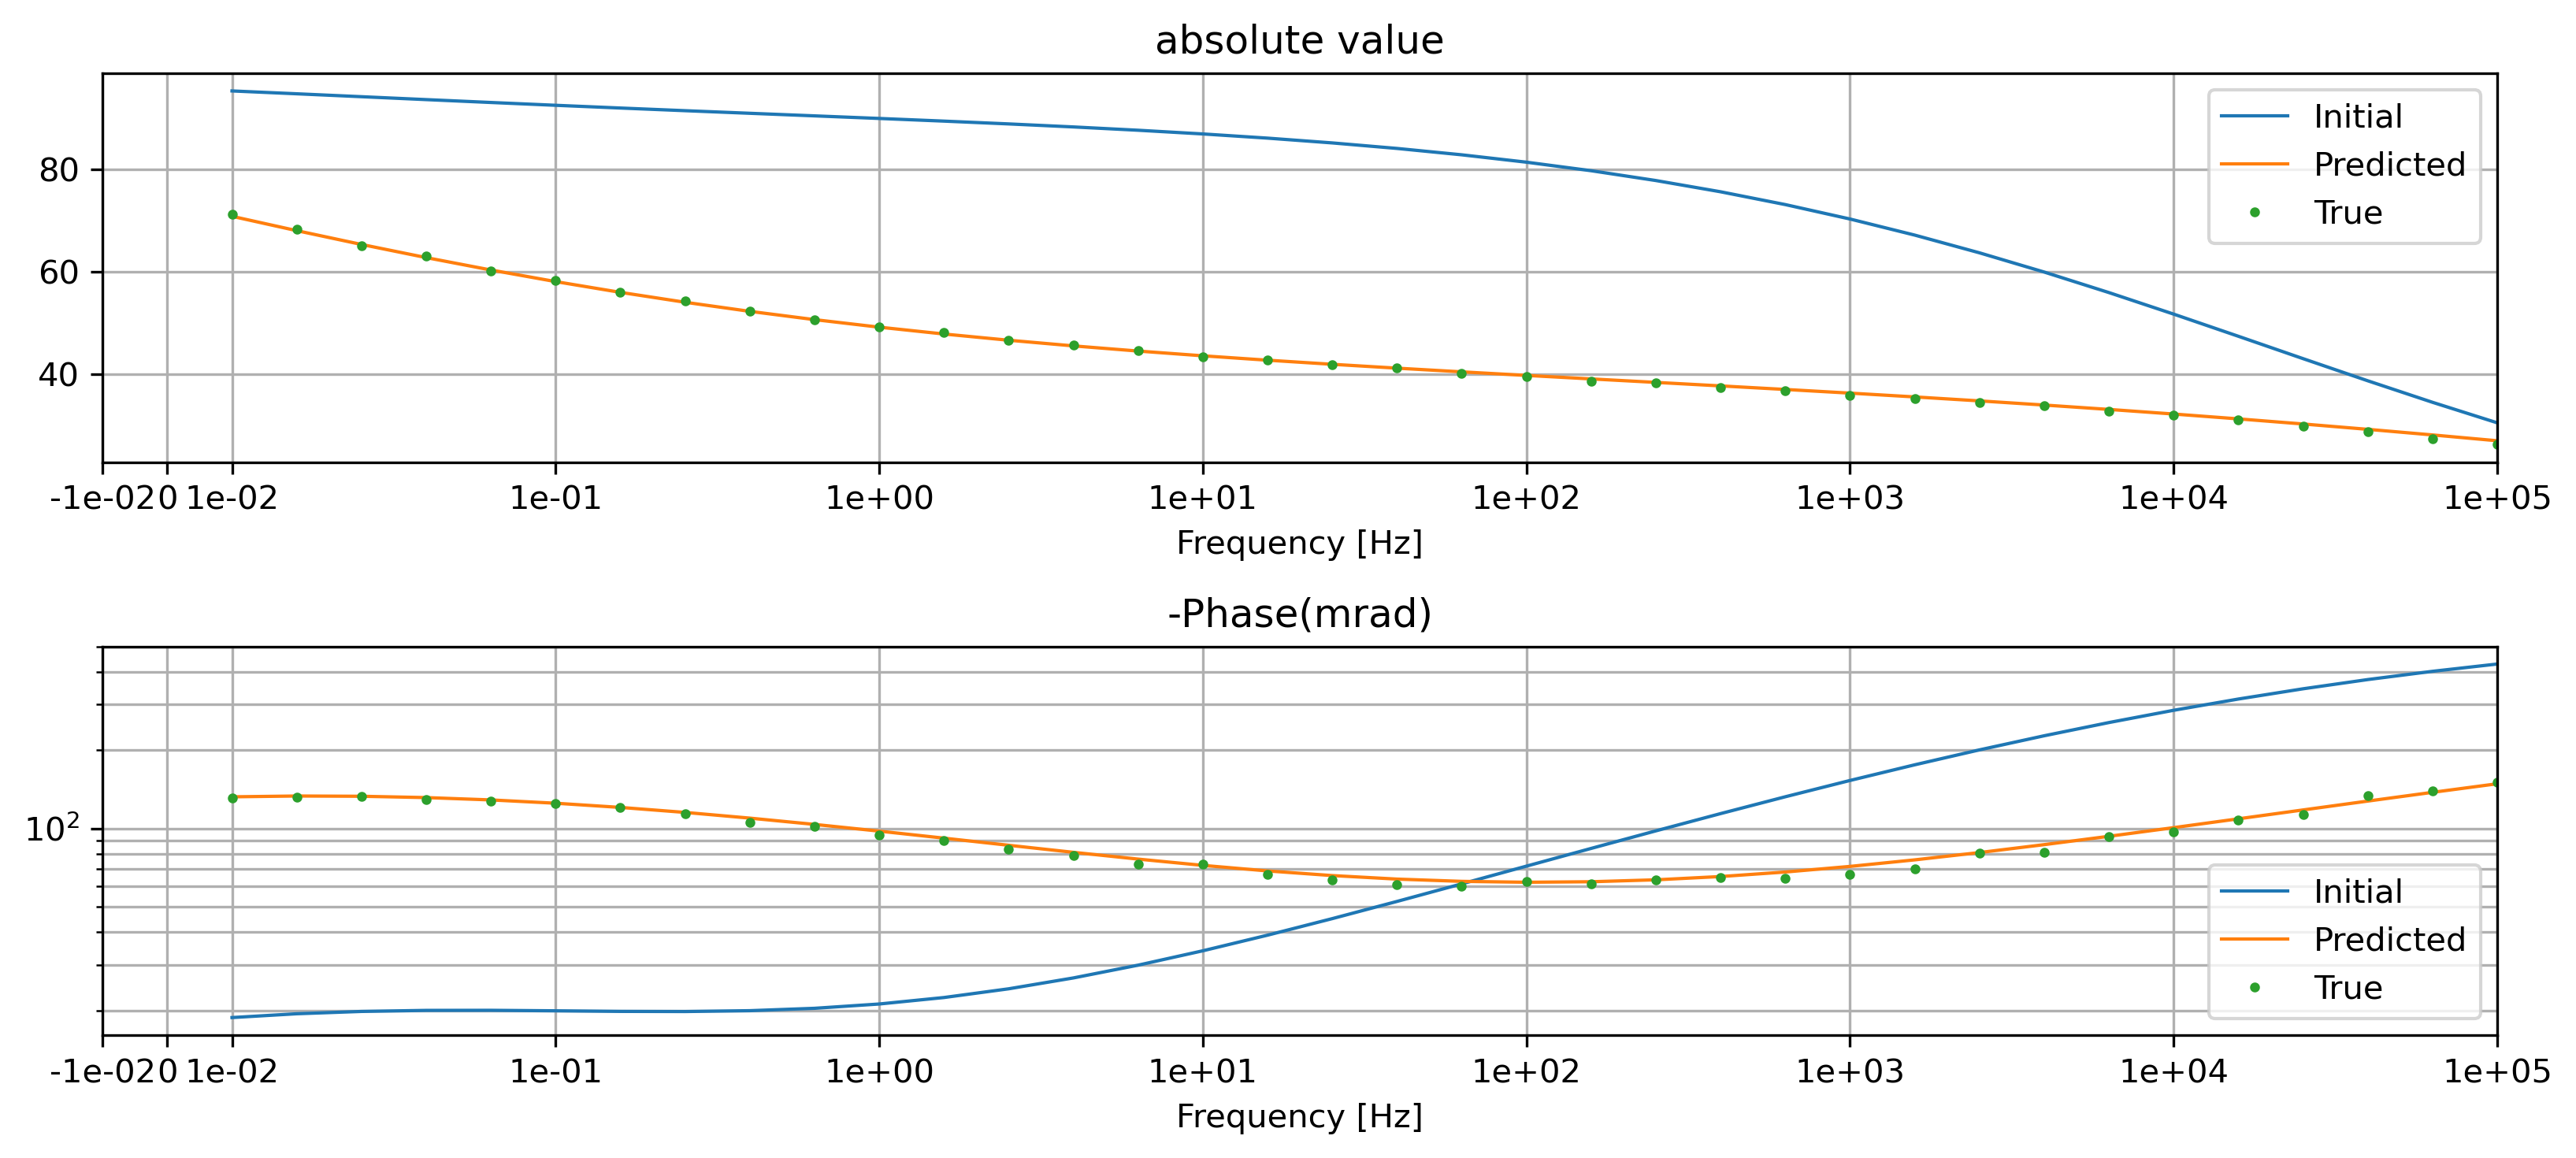

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(11, 5),dpi=300)
ax[0] = PL_pelton.semiplx(x=windows_plot, y=dinit_abs, ax=ax[0], yscale_log=False,
                          color = "C0",label="Initial")
ax[0] = PL_pelton.semiplx(x=windows_plot, y=dest_abs, ax=ax[0], yscale_log=False,
                            color = "C1",label="Predicted")
ax[0] = PL_pelton.semiplx(x=windows_plot, y=dobs_real, ax=ax[0], yscale_log=False,
                 color = "C2",linestyle="",markersize=4.0, marker=".",label="True")
PL_pelton.pl_axes_x(ax=ax[0])
ax[1] = PL_pelton.semiplx(x=windows_plot, y=-dinit_phase, ax=ax[1], yscale_log=True,
                                color = "C0",label="Initial")
ax[1] = PL_pelton.semiplx(x=windows_plot, y=-dest_phase, ax=ax[1], yscale_log=True,
                                color = "C1",label="Predicted")
ax[1] = PL_pelton.semiplx(x=windows_plot, y=-dobs_phase, ax=ax[1], yscale_log=True,
                 color = "C2",linestyle="",markersize=4.0, marker=".",label="True")
PL_pelton.pl_axes_x(ax=ax[1])
for a in ax:
        a.set_xlabel('Frequency [Hz]')
        a.grid(which='both')
        a.legend()
ax[0].set_title('absolute value')
ax[1].set_title('-Phase(mrad)')
plt.tight_layout()

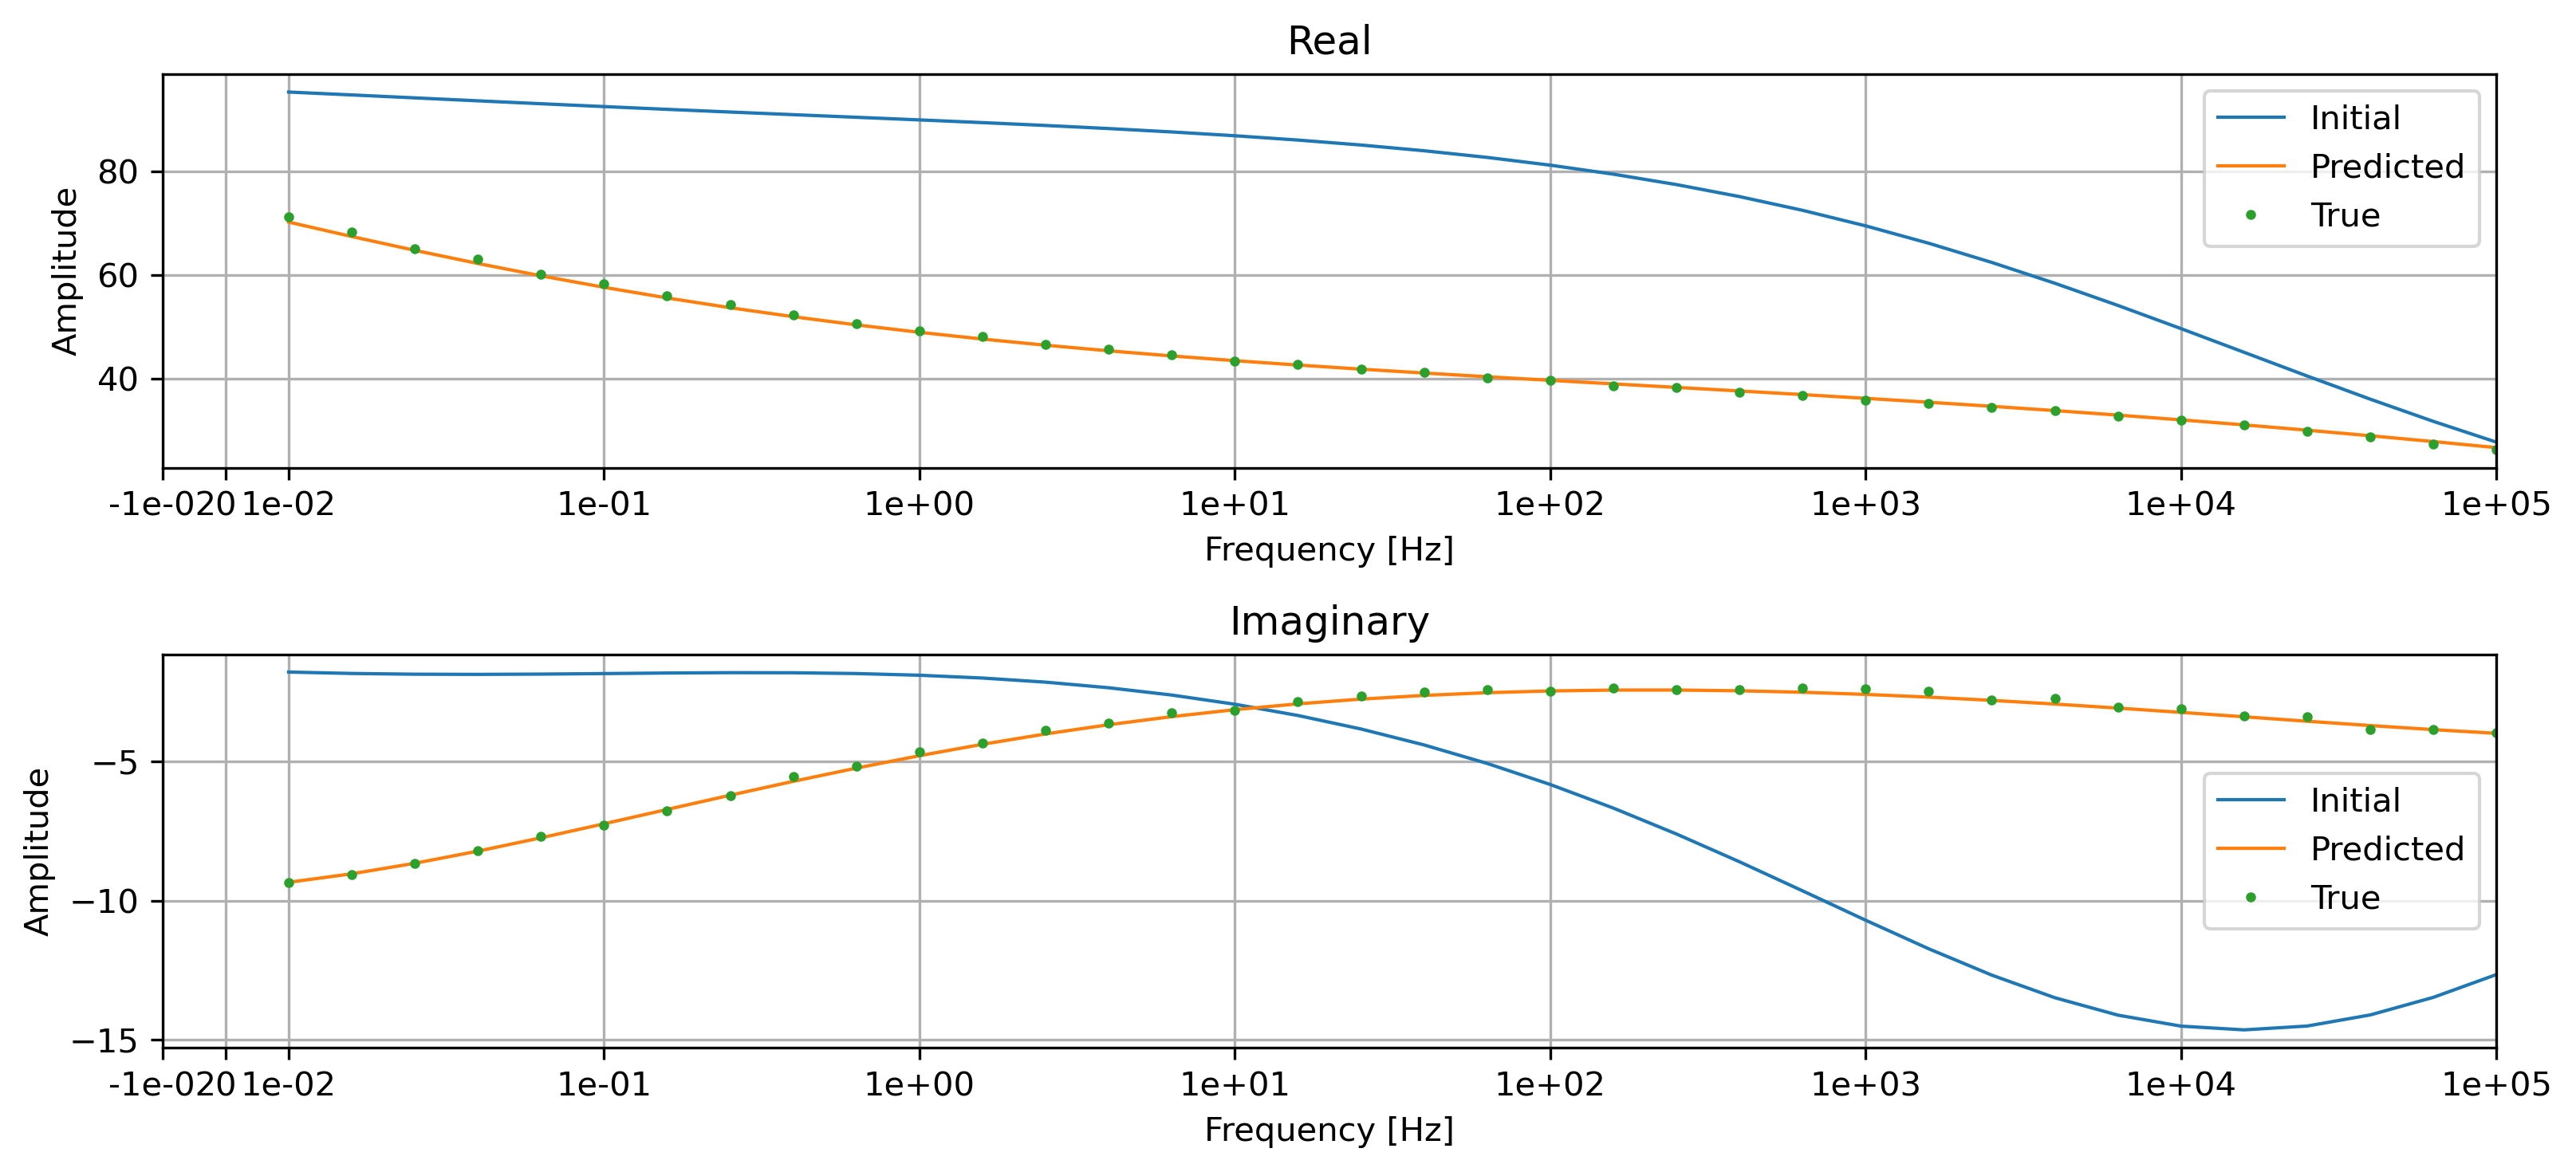

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(11, 5),dpi=300)
ax[0] = PL_pelton.semiplx(x=windows_plot, y=dinit_real, ax=ax[0], yscale_log=False,
                          color = "C0",label="Initial")
ax[0] = PL_pelton.semiplx(x=windows_plot, y=dest_real, ax=ax[0], yscale_log=False,
                            color = "C1",label="Predicted")
ax[0] = PL_pelton.semiplx(x=windows_plot, y=dobs_real, ax=ax[0], yscale_log=False,
                 color = "C2",linestyle="",markersize=4.0, marker=".",label="True")
PL_pelton.pl_axes_x(ax=ax[0])
ax[1] = PL_pelton.semiplx(x=windows_plot, y=dinit_imag, ax=ax[1], yscale_log=False,
                                color = "C0",label="Initial")
ax[1] = PL_pelton.semiplx(x=windows_plot, y=dest_imag, ax=ax[1], yscale_log=False,
                                color = "C1",label="Predicted")
ax[1] = PL_pelton.semiplx(x=windows_plot, y=dobs_imag, ax=ax[1], yscale_log=False,
                 color = "C2",linestyle="",markersize=4.0, marker=".",label="True")
PL_pelton.pl_axes_x(ax=ax[1])
for a in ax:
        a.set_xlabel('Frequency [Hz]')
        a.set_ylabel('Amplitude')
        a.grid(which='both')
        a.legend()
ax[0].set_title('Real')
ax[1].set_title('Imaginary')
plt.tight_layout()

In [40]:
from masa_utils_pytorch import BaseSimulation
class opt_tmp(BaseSimulation):
    def __init__(self, sim):
        self.sim = sim
class opt_tmp(BaseSimulation):  # Inherits from BaseSimulation
    def __init__(self, sim: BaseSimulation):
        self.sim = sim  # Composition: opt_tmp has a simulation

    def dpred(self, m):
        return self.sim.dpred(m)  # Calls InducedPolarization's dpred()

    def J(self, m):
        return self.sim.J(m)  # Calls InducedPolarization's J()
